In [ ]:
from unet import Unet
from n2v import N2VConfig, N2VDataGenerator
from os.path import join
from PIL import Image
import numpy as np

In [ ]:
file_path=r'C:\Users\bioimaging1\Desktop\Deep learning image\actin\actin-20x-noise1-lowsnr.tif'
with Image.open(file_path) as img:
    img.save("example.tif")

In [ ]:
config = N2VConfig(file_paths=["example.tif"],
                   patch_shape=(64, 64),
                   patches_per_batch=128,
                   data_augmentation=True,
                   epochs=100)
unet=Unet(config)

In [ ]:
n2v_data_generator = N2VDataGenerator(config)
history=unet.train(n2v_data_generator)

In [ ]:
result=unet.evaluate(n2v_data_generator, divide=8, save_dir="restored_0")
ssim=np.array(result['ssim'])
psnr=np.array(result['psnr'])
old_ssim=np.array(result['old_ssim'])
old_psnr=np.array(result['old_psnr'])
print(result['duration'])
print('ssim:',ssim.mean().round(2),'\tpsnr:', psnr.mean().round(2))
print('old_ssim:', old_ssim.mean().round(2),'\told_psnr:', old_psnr.mean().round(2))

In [3]:


dataset_dir = r'C:\Users\bioimaging1\Desktop\Deep learning image\actin'
noisy_inputs = ["actin-20x-noise1-lowsnr.tif",
            # "actin-confocal-lowsnr.tif",
            # "actin-60x-noise1-lowsnr.tif",
            # "membrane-lowsnr.tif",
            # "mito-20x-noise1-lowsnr.tif",
            # "mito-60x-noise1-lowsnr.tif",
            # "mito-confocal-lowsnr.tif",
            # "nucleus-lowsnr.tif",
            # "mito-60x-noise2-lowsnr.tif"
            ]
ground_truth = ["actin-20x-noise1-highsnr.tif",
            # "actin-confocal-highsnr.tif",
            # "actin-60x-noise1-highsnr.tif",
            # "membrane-highsnr.tif",
            # "mito-20x-noise1-highsnr.tif",
            # "mito-60x-noise1-highsnr.tif",
            # "mito-confocal-highsnr.tif",
            # "nucleus-highsnr.tif",
            # "mito-60x-noise2-highsnr.tif"
            ] 
file_paths = [join(dataset_dir, dataset) for dataset in noisy_inputs]
ground_truth_paths = [join(dataset_dir, dataset) for dataset in ground_truth]
config = N2VConfig(file_paths, ground_truth_paths,
                   patch_shape=(128, 128),
                   validation_split=0.1,
                   patches_per_batch=32,
                   data_augmentation=True,
                   epochs=10)

n2v_data_generator = N2VDataGenerator(config)
unet = Unet(config, model_summary=False)

In [10]:
config = N2VConfig(file_paths, ground_truth_paths,
                   patch_shape=(128, 128),
                   validation_split=0.1,
                   patches_per_batch=32,
                   data_augmentation=True,
                   epochs=20)

n2v_data_generator = N2VDataGenerator(config)
history = unet.train(n2v_data_generator, early_stopping_patience=5, reduce_lr_patience=2                                                                                )
# 可以在Tensorboard查看训练损失和验证损失的变化情况
# cmd: tensorboard --logdir tensorboard 

------------TRAINING BEGINS-------------
Epoch 1/10
720/720 [==============================] - 331s 460ms/step - loss: 0.0018 - val_loss: 0.0024 - lr: 5.0000e-04
Epoch 2/10
720/720 [==============================] - 328s 456ms/step - loss: 0.0018 - val_loss: 0.0030 - lr: 5.0000e-04
Epoch 3/10
720/720 [==============================] - 328s 455ms/step - loss: 0.0017 - val_loss: 0.0028 - lr: 5.0000e-04
Epoch 4/10
720/720 [==============================] - 325s 451ms/step - loss: 0.0016 - val_loss: 0.0023 - lr: 3.5000e-04
Epoch 5/10
720/720 [==============================] - 323s 448ms/step - loss: 0.0016 - val_loss: 0.0031 - lr: 3.5000e-04
Epoch 6/10
720/720 [==============================] - 322s 447ms/step - loss: 0.0016 - val_loss: 0.0029 - lr: 3.5000e-04
Epoch 7/10
720/720 [==============================] - 319s 443ms/step - loss: 0.0015 - val_loss: 0.0023 - lr: 2.4500e-04
Epoch 8/10
720/720 [==============================] - 321s 446ms/step - loss: 0.0015 - val_loss: 0.0022 - lr: 2.

In [13]:
# unet.model.load_weights("ckpt/best")
result=unet.evaluate(n2v_data_generator, divide=8, save_dir="restored_images_test1")


-----------EVALUATION BEGINS------------
100/100 images have been processed


In [14]:
unet.model.load_weights("ckpt/best")
result=unet.evaluate(n2v_data_generator, divide=1, save_dir=None)
ssim=np.array(result['ssim'])
psnr=np.array(result['psnr'])
old_ssim=np.array(result['old_ssim'])
old_psnr=np.array(result['old_psnr'])
print(result['duration'])
print('ssim:',ssim.mean(),'\tpsnr:', psnr.mean())
print('old_ssim:',old_ssim.mean(),'\told_psnr:', old_psnr.mean())

-----------EVALUATION BEGINS------------


KeyboardInterrupt: 

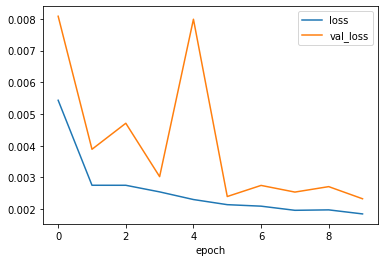

In [9]:
loss=history.history['loss']
val_loss=history.history['val_loss']
import matplotlib.pyplot as plt
epochs=range(len(loss))
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel("epoch")
plt.legend()
